# Data Processing

## Imports & functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [2]:
plt.style.use(['bmh', 'seaborn-poster'])
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
def show(fs, ns, title=""):
    plt.figure()
    
    for n in ns:
        df = pd.read_csv(f"{fs}{n}.csv")
        plt.plot(df.time, df.Pressure, label=f"Trial {n}")
        
    plt.legend()
    
    plt.ylabel("Gas pressure (kPa)")
    plt.xlabel("Time (s)")
    plt.title(title)


In [4]:
def rate(df, start, end):
    slope, *_ = linregress(df.time[start:end], df.Pressure[start:end])
    return slope / (df.Temperature[start:end].mean() + 273.15) * 1000

In [5]:
def rates(fs, ns, start=100, end=201):
    dfs = [pd.read_csv(f"{fs}{n}.csv") for n in ns]
    rates = None
    min_sd = float('inf')
    for i in range(START, END):
        rates_ = []
        for df in dfs:
            if len(df.time[i:i + L]) < L:
                break
            rates_.append(rate(df, i, i + L))
        else:
            rates_ = pd.Series(rates_)
            if rates_.std() < min_sd:
                min_sd = rates_.std()
                rates = rates_
                start = i
            continue
        break
    plt.axvline(dfs[0].time[start], linestyle='--', color='k')
    plt.axvline(dfs[0].time[start + L], linestyle='--', color='k')
    return rates

In [6]:
def xerr(v_h2o2, v_cat=1, v_total=5):
    v_h2o = v_total - v_h2o2 - v_cat
    perc_err = 0.05*2 / v_h2o2 + (0.05 + 0.05 + 0.05)*2 / v_total
    val = v_h2o2 / v_total
    return perc_err * val

## Reaction rate curve

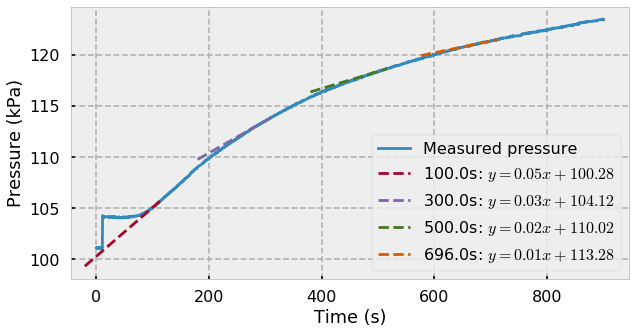

In [7]:
df = pd.read_csv("fe13.csv")
plt.figure()

plt.plot(df.time, df.Pressure, label="Measured pressure")
xlim_min, xlim_max = plt.gca().get_xlim()

for start in range(199, 1600, 385):
    slope, y_intercept, *_ = linregress(df.time[start:start + 31], df.Pressure[start:start + 31])
    xs = np.linspace(df.time[start] - 120, df.time[start + 31])
    ys = slope * xs + y_intercept
    plt.plot(xs, ys, '--', label="{}s: $y = {: .2f}x {:+.2f}$".format(df.time[start], slope, y_intercept))

plt.xlim(xlim_min, xlim_max)

# plt.title("Rate of decomposition of $\mathregular{H_2O_2}$ with the presence of $\mathregular{FeCl_3}$ catalyst")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (kPa)")

plt.legend()

plt.show()

## Reaction rates

In [8]:
L = 31
START = 121
END = 251

0    0.052786
1    0.163550
2    0.117332
3    0.065269
dtype: float64

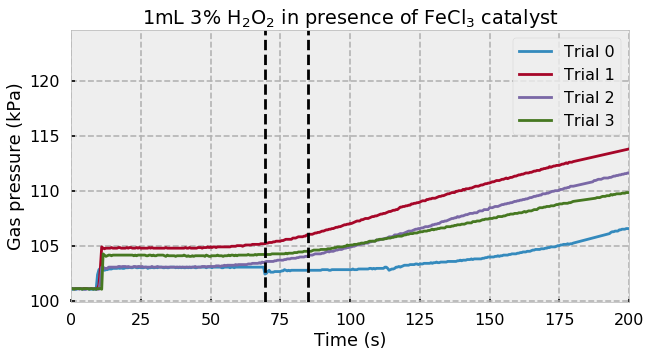

In [9]:
show("fe1", range(4), "1mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
plt.xlim(0, 200)
rates("fe1", range(4))

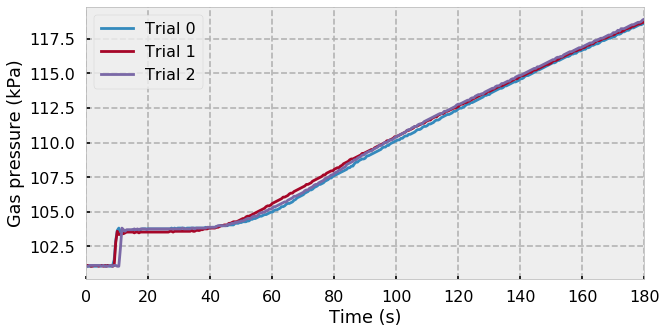

In [10]:
show("fe1half", range(3))

# plt.minorticks_on()
# plt.grid(b=True, which='both', linestyle='-')
plt.xlim(0, 180);

0    0.361317
1    0.354362
2    0.357481
dtype: float64

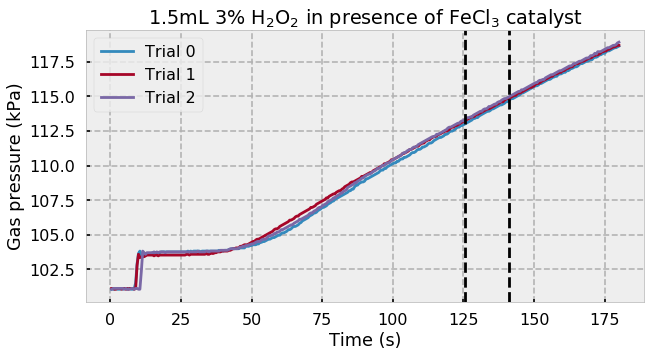

In [11]:
show("fe1half", range(3), "1.5mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe1half", range(3))

0    0.237688
1    0.130140
2    0.574403
3    0.361445
4    0.396702
dtype: float64

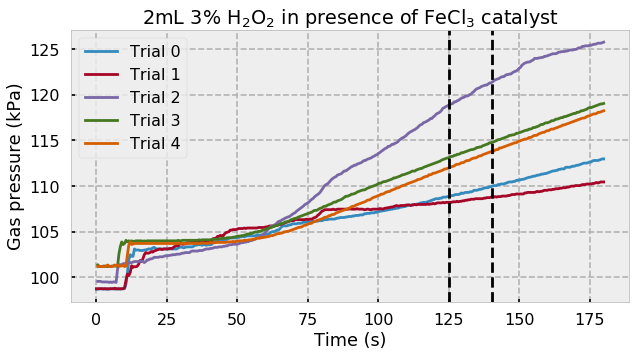

In [12]:
show("fe2", range(5), "2mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe2", range(5))

0    0.606059
1    0.678815
2    0.666539
dtype: float64

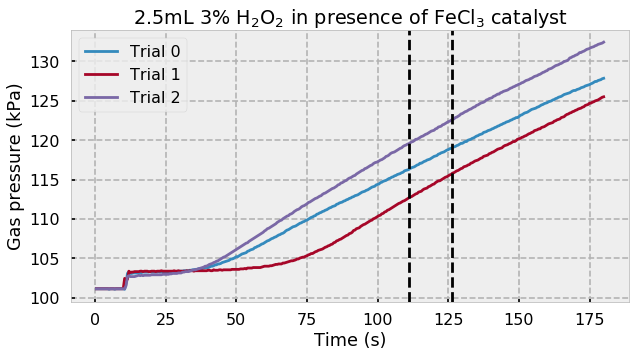

In [13]:
show("fe2half", range(3), "2.5mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe2half", range(3))

0    0.912886
1    0.909404
2    0.891345
3    0.908127
dtype: float64

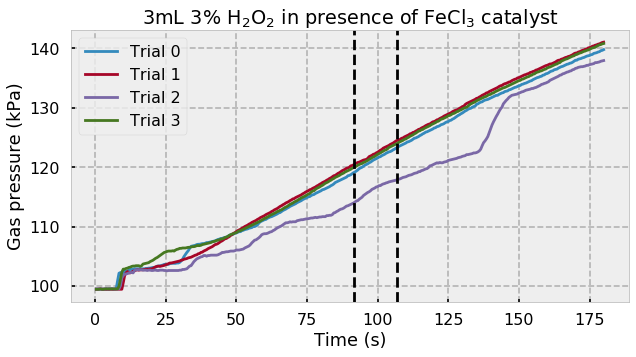

In [14]:
show("fe3", range(4), "3mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe3", range(4))

0    1.005906
1    0.977028
2    0.968369
dtype: float64

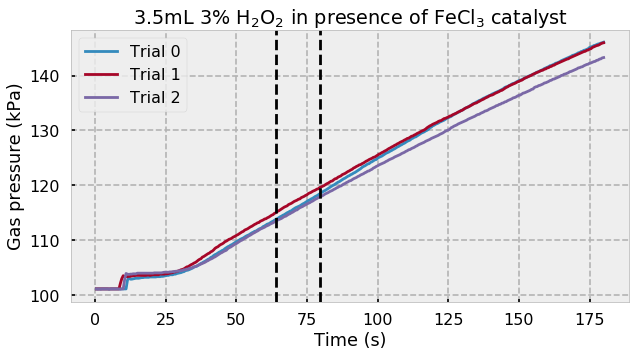

In [15]:
show("fe3half", range(3), "3.5mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe3half", range(3))

0    1.398770
1    1.511784
2    1.451853
dtype: float64

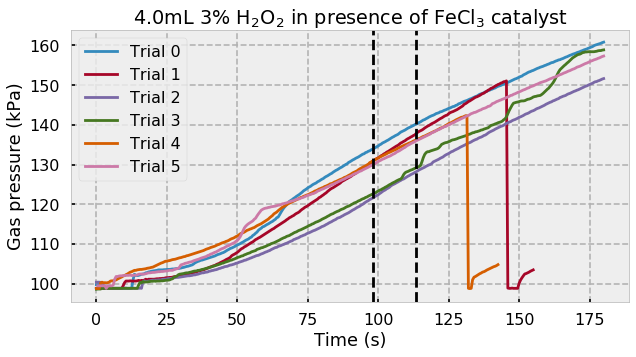

In [16]:
show("fe4", range(6), "4.0mL 3% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe4", range(3))

0    0.916710
1    0.897199
2    0.903947
3    0.789424
dtype: float64

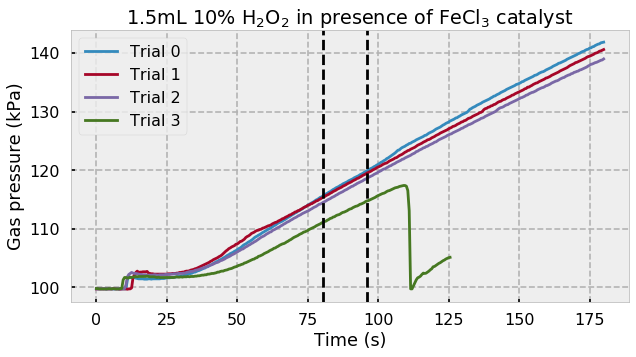

In [17]:
show("fe3%", range(4), "1.5mL 10% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("fe3%", range(4))

0    1.389929
1    1.977953
2    2.847307
3    1.826436
4    1.346785
dtype: float64

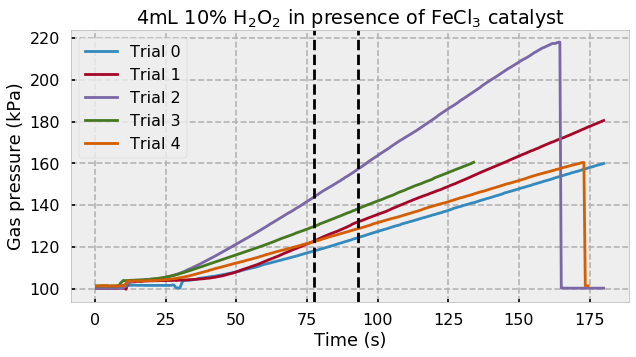

In [18]:
show("feconc", range(5), "4mL 10% $\mathregular{H_2O_2}$ in presence of $\mathregular{FeCl_3}$ catalyst")
rates("feconc", range(5))

## Graphs

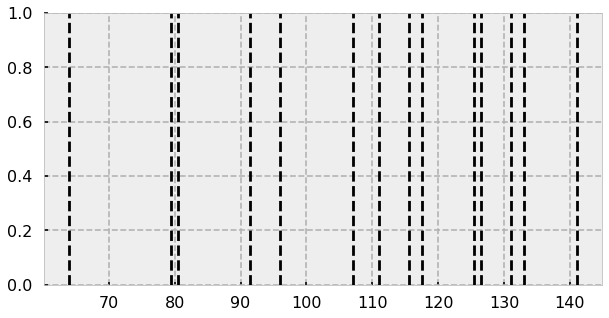

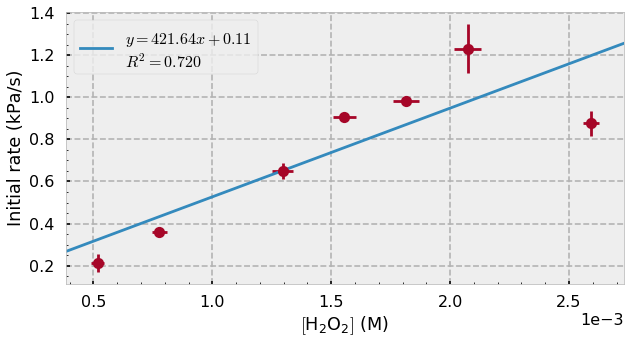

In [27]:
xs = []
ys = []
xerrs = []
yerrs = []

rs = rates("fe1", {1, 2, 3})
xs.append(3 * 1.0/5)
ys.append(rs.mean())
xerrs.append(xerr(1.0))
yerrs.append(rs.std())


rs = rates("fe1half", {0, 1, 2})
xs.append(3 * 1.5/5)
ys.append(rs.mean())
xerrs.append(xerr(1.5))
yerrs.append(rs.std())

# rs = rates("fe2", {0, 1, 2, 3, 4})
# xs.append(3 * 2.0/5)
# ys.append(rs.mean())
# xerrs.append(xerr(2.0))
# yerrs.append(rs.std())

rs = rates("fe2half", {0, 1, 2})
xs.append(3 * 2.5/5)
ys.append(rs.mean())
xerrs.append(xerr(2.5))
yerrs.append(rs.std())

rs = rates("fe3", {0, 1, 2, 3})
xs.append(3 * 3.0/5)
ys.append(rs.mean())
xerrs.append(xerr(3.0))
yerrs.append(rs.std())

rs = rates("fe3half", {0, 1, 2})
xs.append(3 * 3.5/5)
ys.append(rs.mean())
xerrs.append(xerr(3.5))
yerrs.append(rs.std())


rs = rates("fe4", {0, 1, 2, 3, 4, 5})
xs.append(3 * 4.0/5)
ys.append(rs.mean())
xerrs.append(xerr(4.0))
yerrs.append(rs.std())

rs = rates("fe3%", {0, 1, 2, 3})
xs.append(10 * 1.5/5)
ys.append(rs.mean())
xerrs.append(xerr(1.5))
yerrs.append(rs.std())

# rs = rates("feconc", {0, 1, 2, 3, 4})
# xs.append(10 * 4.0/5)
# ys.append(rs.mean())
# xerrs.append(xerr(4.0))
# yerrs.append(rs.std())

# To molar concentration
xs = np.array(xs)
ys = np.array(ys)
xerrs = np.array(xerrs)
yerrs = np.array(yerrs)

xs *= 1.44 / 34.02 * 1 / (1 + 1.44 / (1.00 * 3/100))
xerrs *= 1.44 / 34.02 * 1 / (1 + 1.44 / (1.00 * 3/100))

plt.figure()

for x, y, x_err, y_err in zip(xs, ys, xerrs, yerrs):
    plt.errorbar(x=x, y=y, xerr=x_err, yerr=y_err, marker='o', color='C1')

slope, y_intercept, *_ = linregress(xs, ys)
xlim_min, xlim_max = plt.gca().get_xlim()
r2 = r2_score(ys, slope * xs + y_intercept)
xs_ = np.linspace(xlim_min, xlim_max)
plt.plot(xs_, slope * xs_ + y_intercept, 
         label="$y = {: .2f}x {:+.2f}$\n$R^2={:.3f}$".format(slope, y_intercept, r2))
plt.xlim(xlim_min, xlim_max)

plt.xlabel("$[\mathregular{H_2O_2}]$ (M)")
plt.ylabel("Initial rate (kPa/s)")
# plt.grid(which='both')
# plt.title("$\mathregular{FeCl_3}$–catalysed decomposition of $\mathregular{H_2O_2}$")

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.minorticks_on()

plt.legend()

plt.show()

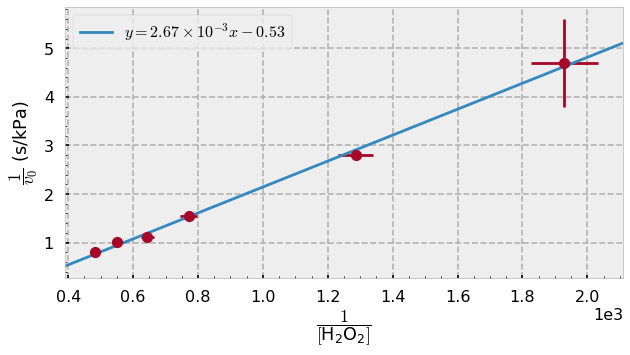

In [24]:
plt.figure()

for i in range(len(xs)):
    plt.errorbar(
        x=1 / xs[i],
        y=1 / ys[i],
        xerr=xerrs[i] / xs[i] / xs[i],
        yerr=yerrs[i] / ys[i] / ys[i],
        marker='o',
        color='C1'
    )

# inds = [True, True, False, True, True, True, True]
# slope, y_intercept, *_ = linregress(1 / xs[inds], 1 / ys[inds])
# print("{:.2E}".format(slope))
slope, y_intercept, *_ = linregress(1 / xs, 1 / ys)
xlim_min, xlim_max = plt.gca().get_xlim()
r2 = r2_score(1 / ys, slope * 1 / xs + y_intercept)
xs_ = np.linspace(xlim_min, xlim_max)
plt.plot(xs_, slope * xs_ + y_intercept, 
#          label="$y = {: .2f}x {:+.2f}$\n$R^2={:.3f}$".format(slope, y_intercept, r2))
         label="$y = 2.67\\times10^{{-3}}x {:+.2f}$".format(y_intercept))
plt.xlim(xlim_min, xlim_max)

plt.xlabel("$\dfrac{1}{[\mathregular{H_2O_2}]}$")
plt.ylabel("$\dfrac{1}{v_0}$ (s/kPa)")
# plt.title("$\mathregular{FeCl_3}$–catalysed decomposition of $\mathregular{H_2O_2}$")

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.minorticks_on()

plt.legend()

plt.show()

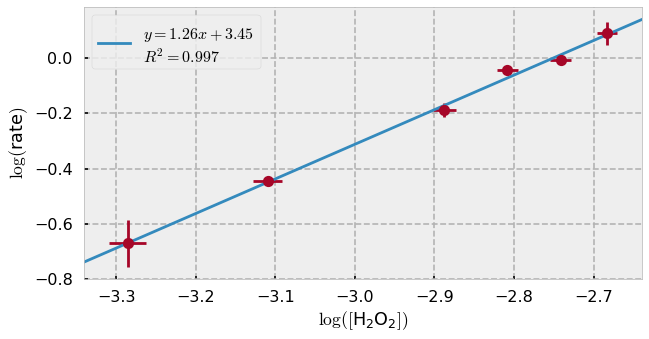

In [25]:
plt.figure()

for i in range(len(xs)):
    plt.errorbar(
        x=np.log10(xs[i]),
        y=np.log10(ys[i]),
        xerr=xerrs[i] / xs[i] / np.log(10),
        yerr=yerrs[i] / ys[i] / np.log(10),
        marker='o',
        color='C1'
    )

slope, y_intercept, *_ = linregress(np.log10(xs), np.log10(ys))
xlim_min, xlim_max = plt.gca().get_xlim()
r2 = r2_score(np.log10(ys), slope * np.log10(xs) + y_intercept)
xs_ = np.linspace(xlim_min, xlim_max)
plt.plot(xs_, slope * xs_ + y_intercept, 
         label="$y = {: .2f}x {:+.2f}$\n$R^2={:.3f}$".format(slope, y_intercept, r2))
plt.xlim(xlim_min, xlim_max)

plt.xlabel("$\log ([\mathregular{H_2O_2}])$")
plt.ylabel("$\log (\mathregular{rate})$")
# plt.title("$\mathregular{FeCl_3}$-catalysed decomposition of $\mathregular{H_2O_2}$")

plt.legend()

plt.show()

In [22]:
data = pd.DataFrame({'H2O2': xs, 'rate': ys, 'H2O2_uncert': xerrs, 'rate_uncert': yerrs})
data

,H2O2,rate,H2O2_uncert,rate_uncert
0,0.000518,0.213131,0.000028,0.041412
1,0.000777,0.357720,0.000033,0.003483
2,0.001037,0.340075,0.000038,0.168173
3,0.001296,0.650471,0.000043,0.038949
4,0.001555,0.905440,0.000048,0.009610
5,0.001814,0.983768,0.000054,0.019655
6,0.002073,1.229905,0.000059,0.116508
